# 0.4 4-order simplectic integrator (Yoshida)

In [49]:
%matplotlib notebook 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy 

La ecuación diferencial de un oscilador armónico está dada por:

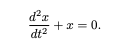

 donde la masa y la constante del resorte son iguales a uno. Las condiciones iniciales del problema
son:

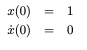

Resuelva la ecuacion diferencial usando el método simpléctico de orden 4 en el intervalo 0 < t < 10 s.
Compare la energıa total del oscilador con el metodo de Leap-Frog o de orden 2 visto en clase.
Intervalo 0<t<10s

Definición de Aceleración

In [198]:
def GetA(x):
    return -x

Metódo de Yoshida

In [199]:
def GetYoshida(Ti,Tf, h, r0):
    N = int((Tf - Ti)/ h)
    t= np.linspace(Ti,Tf, N)
    x = np.zeros(len(t))
    v = np.zeros(len(t))
    x[0], v[0]=r0 
    
    a0=(np.cbrt(2))/(2- np.cbrt(3))
    A0 = -a0
    a1=2-(np.cbrt(2))
    A1 = (1)/a1
    a12=A0+A1
    k1 = [A1/2, a12/2, a12/2, A1/2 ]
    k2 = [A1, A0, A1]
    for i in range(1,len(t)):
        dt = t[i]-t[i-1]
        x1 = x[i-1] + k1[0]*v[i-1]*dt
        v1 = v[i-1] + k2[0]*GetA(x1)*dt
        
        x2 = x1 + k1[1]*v1*dt
        v2 = v1 + k2[1]*GetA(x2)*dt
        
        x3 = x2 + k1[2]*v2*dt
        v3 = v2 + k2[2]*GetA(x3)*dt

        x[i] = x3 + k1[3]*v3*dt
        v[i]= v3
        
    return x, v, t

Metodo de LeapFrog de Segundo orden

In [200]:
def GetLeapFrog(r0,t):
    N = len(t)
    h = t[1] - t[0]
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador
    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*GetA(x[0])
    for i in range(1,N):
        v[i] = v[i-1] + h*GetA(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    return X,V

<IPython.core.display.Javascript object>


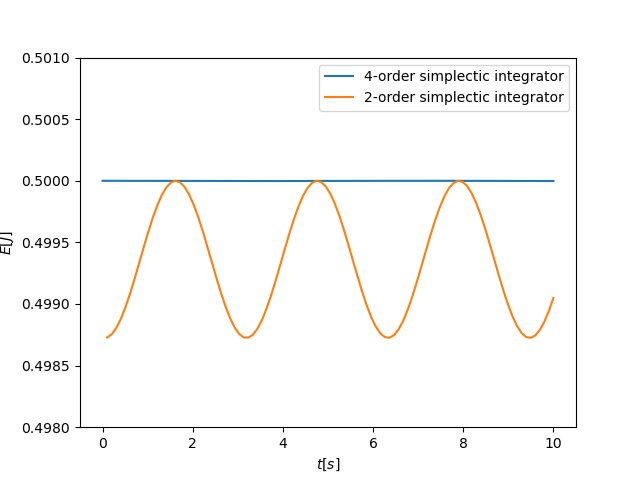

In [201]:
r0=np.array([1,0])
TMin, TMax, N = 0.,10., 100
t = np.linspace(TMin, TMax, N)
#Posiciones, velocidad y energía de Yoshida y LeapFrog
x,v,time = GetYoshida(TMin,TMax, 0.001, r0)
EM =np.zeros(len(x))

x2, v2 = GetLeapFrog(r0,t)
EMLeap =np.zeros(len(x2))

for i in range(len(v)):
    EM[i]=((1/2)*x[i]**2)+ ((1/2)*v[i]**2)
for i in range(len(v2)):
    EMLeap[i]=(1/2)*x2[i]**2+(1/2)*v2[i]**2

plt.plot(time,EM,label="4-order simplectic integrator")

plt.plot(t[1:],EMLeap,label="2-order simplectic integrator")

plt.xlabel("$t[s]$")
plt.ylabel("$E[J]$")
plt.ylim(0.4980,0.5010)
plt.legend()